In [ ]:
from google_play_scraper import Sort, reviews
import pandas as pd

result, _ = reviews(
    'com.application.zomato',  # Zomato app ID
    lang='en',
    country='in',
    sort=Sort.NEWEST,
    count=2000  # 👈 change this to 2000
)

df = pd.DataFrame(result)
df.to_csv("zomato_reviews.csv", index=False)
print("✅ Scraped", len(df), "reviews.")


✅ Scraped 2000 reviews.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
df = pd.read_csv(r"C:\Users\sadid\OneDrive\Desktop\zomato_reviews.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f186bba1-719d-40c9-9687-8e43490766de,Deepak Wakade,https://play-lh.googleusercontent.com/a-/ALV-U...,great app,5,0,18.9.7,2025-07-04 20:11:10,Thank you for your deliciously kind words! If ...,2025-07-04 20:13:39,18.9.7
1,7863f328-d0f4-4a3e-b773-8ba6cc2b7500,Prem Gurung,https://play-lh.googleusercontent.com/a-/ALV-U...,Good,4,0,18.9.9,2025-07-04 20:11:00,NaN,NaN,18.9.9
2,17765754-4ea5-4537-8155-3529c517cbf8,Kripal Singh,https://play-lh.googleusercontent.com/a/ACg8oc...,good service but may have minor issues at over...,4,0,NaN,2025-07-04 20:10:41,Thank you for your deliciously kind words! If ...,2025-07-04 20:13:37,NaN
3,c8248962-2440-4ccd-a2b5-86a65fc8828e,swati sharda,https://play-lh.googleusercontent.com/a-/ALV-U...,Nice and user friendly,5,0,18.9.8,2025-07-04 20:09:55,NaN,NaN,18.9.8
4,66996c56-4010-413b-aea8-1c3a2e531208,VRG Home Fab,https://play-lh.googleusercontent.com/a/ACg8oc...,good,5,0,NaN,2025-07-04 20:09:47,NaN,NaN,NaN


In [4]:
print(df.shape)

(2000, 11)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              2000 non-null   object
 1   userName              2000 non-null   object
 2   userImage             2000 non-null   object
 3   content               2000 non-null   object
 4   score                 2000 non-null   int64 
 5   thumbsUpCount         2000 non-null   int64 
 6   reviewCreatedVersion  1608 non-null   object
 7   at                    2000 non-null   object
 8   replyContent          864 non-null    object
 9   repliedAt             864 non-null    object
 10  appVersion            1608 non-null   object
dtypes: int64(2), object(9)
memory usage: 172.0+ KB
None


In [6]:
print(df.describe())

            score  thumbsUpCount
count  2000.00000    2000.000000
mean      4.30450       0.063000
std       1.31554       2.203284
min       1.00000       0.000000
25%       4.00000       0.000000
50%       5.00000       0.000000
75%       5.00000       0.000000
max       5.00000      98.000000


In [7]:
print(df.isnull().sum())

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion     392
at                         0
replyContent            1136
repliedAt               1136
appVersion               392
dtype: int64


In [10]:
df.head()


,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,appVersion
0,Deepak Wakade,great app,5,0,18.9.7,2025-07-04 20:11:10,Thank you for your deliciously kind words! If ...,18.9.7
1,Prem Gurung,Good,4,0,18.9.9,2025-07-04 20:11:00,NaN,18.9.9
2,Kripal Singh,good service but may have minor issues at over...,4,0,NaN,2025-07-04 20:10:41,Thank you for your deliciously kind words! If ...,NaN
3,swati sharda,Nice and user friendly,5,0,18.9.8,2025-07-04 20:09:55,NaN,18.9.8
4,VRG Home Fab,good,5,0,NaN,2025-07-04 20:09:47,NaN,NaN


In [12]:
df['reviewCreatedVersion']=df['reviewCreatedVersion'].fillna('unknown', inplace=True)

In [14]:
df['appVersion']=df['appVersion'].fillna('unknown', inplace=True)

In [20]:
df['replyContent'].fillna('No reply from developer', inplace=True)

C:\Users\sadid\AppData\Local\Temp\ipykernel_11608\561787076.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['replyContent'].fillna('No reply from developer', inplace=True)


In [19]:
print(df.columns)


Index(['userName', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion',
       'at', 'replyContent', 'appVersion'],
      dtype='object')


In [21]:
print(df.isnull().sum())

userName                   0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    2000
at                         0
replyContent               0
appVersion              2000
dtype: int64


In [22]:
print("Unique Scores:", df['score'].unique())

Unique Scores: [5 4 1 3 2]


In [23]:
print("Unique App Versions:", df['appVersion'].unique())

Unique App Versions: [None]


In [24]:
print("Unique Review Versions:", df['reviewCreatedVersion'].unique())

Unique Review Versions: [None]


In [27]:
df.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,appVersion
0,Deepak Wakade,great app,5,0,None,2025-07-04 20:11:10,No reply from developer,None
1,Prem Gurung,Good,4,0,None,2025-07-04 20:11:00,No reply from developer,None
2,Kripal Singh,good service but may have minor issues at over...,4,0,None,2025-07-04 20:10:41,No reply from developer,None
3,swati sharda,Nice and user friendly,5,0,None,2025-07-04 20:09:55,No reply from developer,None
4,VRG Home Fab,good,5,0,None,2025-07-04 20:09:47,No reply from developer,None


In [33]:
print("Shape:", df.shape)

Shape: (2000, 9)


C:\Users\sadid\AppData\Local\Temp\ipykernel_11608\680642436.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='score', palette='coolwarm')


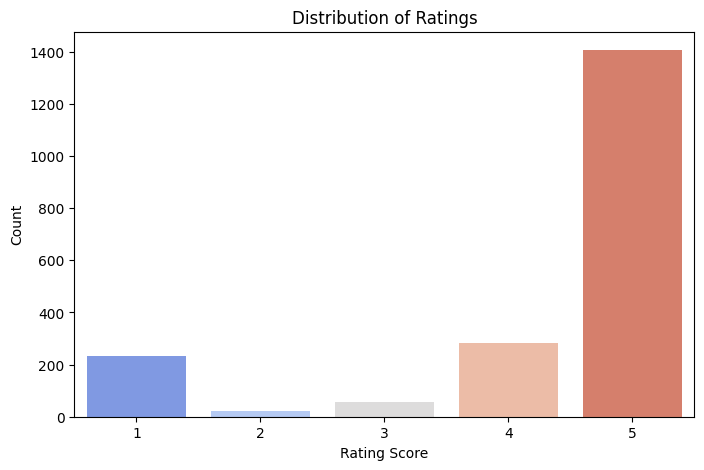

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='score', palette='coolwarm')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Score')
plt.ylabel('Count')
plt.show()


In [26]:
# Plot reviews over time
plt.figure(figsize=(12,5))
df['at'].dt.date.value_counts().sort_index().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

<Figure size 1200x500 with 0 Axes>

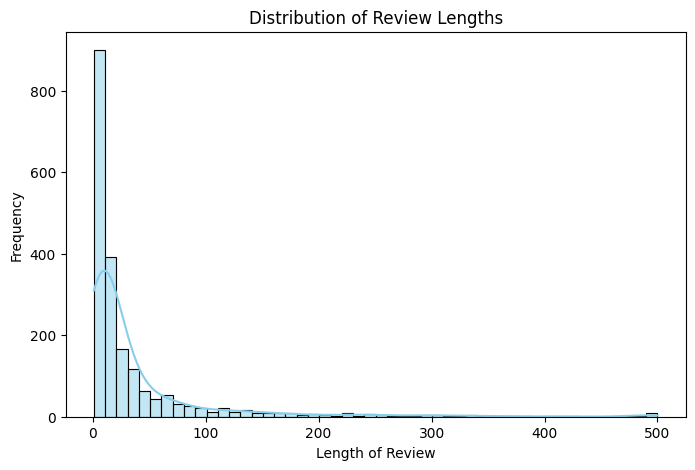

In [28]:
# Add new column for length of content
df['review_length'] = df['content'].apply(len)

# Plot review length distribution
plt.figure(figsize=(8,5))
sns.histplot(df['review_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()


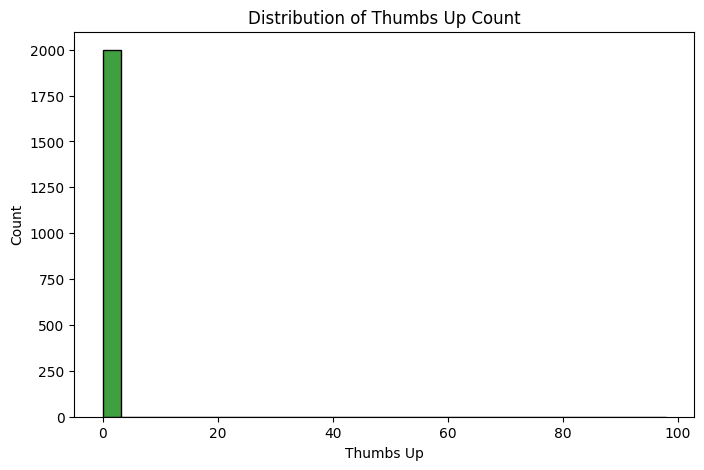

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['thumbsUpCount'], bins=30, color='green')
plt.title('Distribution of Thumbs Up Count')
plt.xlabel('Thumbs Up')
plt.ylabel('Count')
plt.show()


In [30]:
print("Duplicate reviews:", df.duplicated().sum())

Duplicate reviews: 0


In [31]:
print("Empty reviews:", df['content'].apply(lambda x: x.strip() == '').sum())

Empty reviews: 0


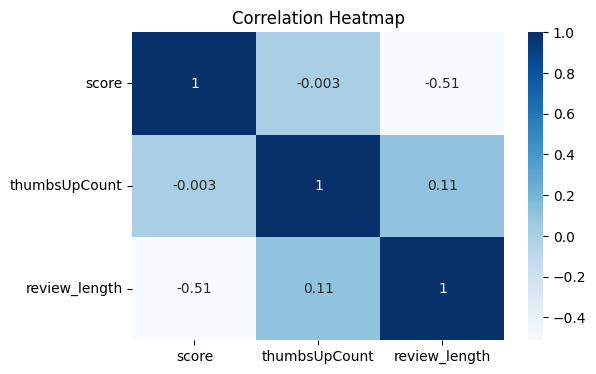

In [32]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['score', 'thumbsUpCount', 'review_length']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()
